In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
print(df.shape)
df.head(df.shape[0])

(500, 3)


,X1,X2,Y
0,313,442,0
1,271,385,0
2,172,200,1
3,361,380,0
4,456,33,0
...,...,...,...
495,450,70,0
496,277,429,0
497,184,179,1
498,153,16,2


In [53]:
def normalize(input):
  if input == 0:
    return [1,0,0]
  elif input == 1:
    return [0,1,0]
  elif input == 2:
    return [0,0,1]
  else:
    return [0, 0, 0]

In [54]:
X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
Y = df["Y"].values.tolist()

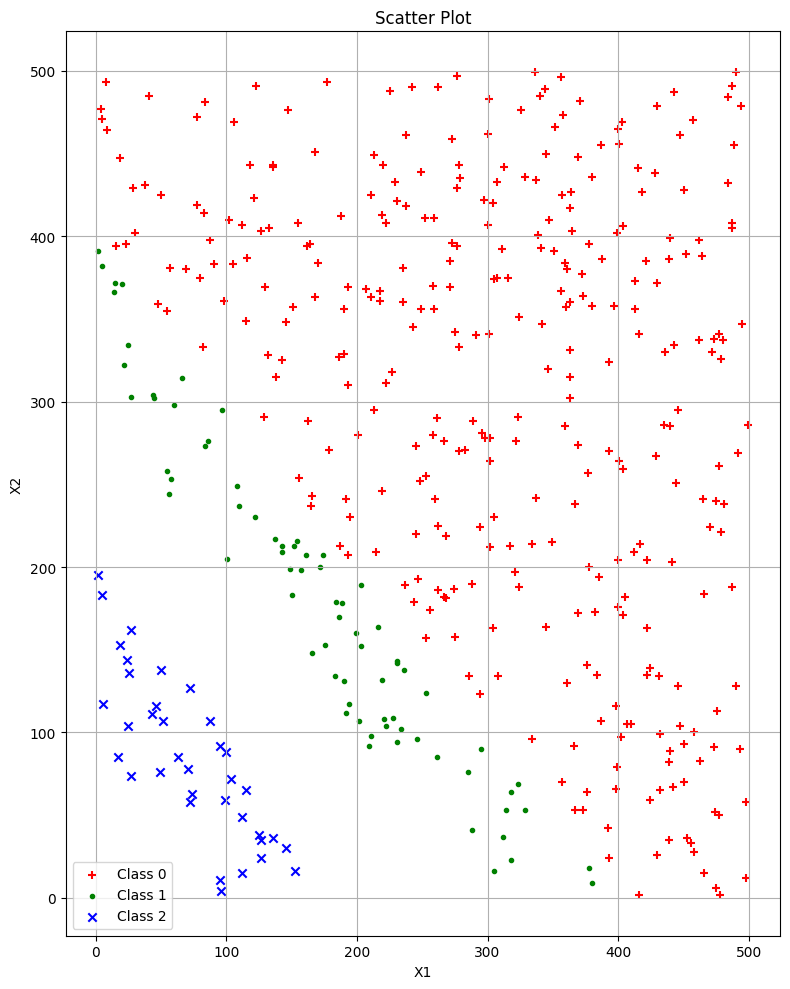

In [55]:
plt.figure(figsize=(8,10))


X1 = np.array(X1)
X2 = np.array(X2)
Y = np.array(Y)

plt.scatter(X1[Y==0], X2[Y==0], color='red', marker='+', label='Class 0')
plt.scatter(X1[Y==1], X2[Y==1], color='green', marker='.', label='Class 1')
plt.scatter(X1[Y==2], X2[Y==2], color='blue', marker='x', label='Class 2')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
features = list(zip(X1, X2))

features_np = np.array(features)

Y2 = np.array([normalize(i) for i in Y])

features_train = features_np[:300]
Y2_train = Y2[:300]

features_test = features_np[300:]
Y2_test = Y2[300:]

# Neural Network - Training & testing

In [57]:
class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2, hidden1LayerNeurons = 20, hidden2LayerNeurons = 20, hidden3LayerNeurons = 20, outLayerNeurons = 3, learning_rate = 0.001, activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate

        # random weight
        self.W_H1I = np.random.randn(inputLayerNeurons, hidden1LayerNeurons)
        self.W_H2H1 = np.random.randn(hidden1LayerNeurons, hidden2LayerNeurons)
        self.W_H3H2 = np.random.randn(hidden2LayerNeurons, hidden3LayerNeurons)
        self.W_OH3 = np.random.randn(hidden3LayerNeurons, outLayerNeurons)

        # random bias
        self.biases = [
            np.random.randn(hidden1LayerNeurons),
            np.random.randn(hidden2LayerNeurons),
            np.random.randn(hidden3LayerNeurons),
            np.random.randn(outLayerNeurons)
        ]

    def activation(self, x, der=False):
        if self.activation_type == 'sigmoid':
            if der == True:
                return np.exp(-x) / (1 + np.exp(-x))**2
            else:
                return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I) + self.biases[0]
        self.hidden1_output = self.activation(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1) + self.biases[1]
        self.hidden2_output = self.activation(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H3H2) + self.biases[2]
        self.hidden3_output = self.activation(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_OH3) + self.biases[3]
        pred = self.activation(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3H2 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_OH3 += self.hidden3_output.T.dot(output_delta)

        self.biases[0] += self.learning_rate * np.sum(hidden1_delta, axis=0)
        self.biases[1] += self.learning_rate * np.sum(hidden2_delta, axis=0)
        self.biases[2] += self.learning_rate * np.sum(hidden3_delta, axis=0)
        self.biases[3] += self.learning_rate * np.sum(output_delta, axis=0)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)


/tmp/ipython-input-1827230581.py:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 0, error: 0.2520323345245037
Epoch: 10000, error: 0.12490598804152553
Epoch: 20000, error: 0.12426047834873595
Epoch: 30000, error: 0.12387529016072701
Epoch: 40000, error: 0.12360399809585487
Epoch: 50000, error: 0.12339781588586125
Epoch: 60000, error: 0.12323334429890527
Epoch: 70000, error: 0.12309757668336033
Epoch: 80000, error: 0.12298260241864113
Epoch: 90000, error: 0.12288330677590477


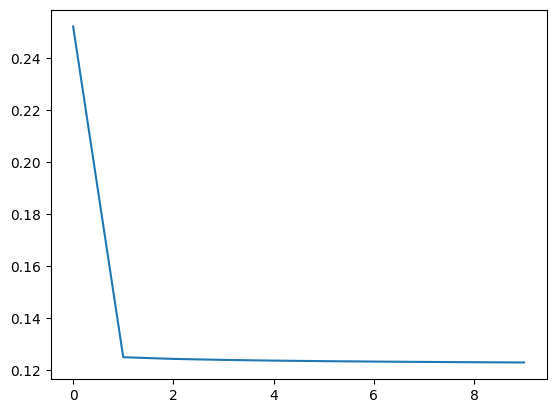

In [58]:
NN = NeuralNetwork(activation_type = 'sigmoid')
err_list = []

for i in range(100000):
    NN.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

In [59]:
def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

In [60]:
def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

In [61]:
pred = NN.feedForward([75,-33])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))


[0.46848623 0.32386059 0.01280553]
{'Class-0': np.float64(46.84862280275642), 'Class-1': np.float64(32.386058589725906), 'Class-2': np.float64(1.2805526387560595)}
Class-0


#Performance Metrics

In [62]:
predictions = NN.feedForward(features_test)
#print(f"Predictions: {predictions}")

# Calculate recall and F1 score
Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.76
Precision for each class:
Class 0: 0.76
Class 1: 0.0
Class 2: 0.0
Recall: 0.3333333333333333
F1 Score overall: 0.2878787878787879


/tmp/ipython-input-1827230581.py:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
# f1 score fr each class

f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

F1 Scores for each class:
Class 0: 0.8636363636363636
Class 1: 0.0
Class 2: 0.0
